## 💡 재구매율 
목적 :) 재구매한 고객들을 파악해서 재구매율 예측 모델 생성 


📍 EDA

In [1]:
# 불러오기 
import pandas as pd

In [2]:
final = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/final.csv')
final = final.sort_values(by='game_date')
final = final.reset_index()
final = final.drop(['index'], axis = 1)

In [3]:
final

,membership_no,game_date,game_time,match_info,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,rank,sale,audience,new_price,reserve_diff,MB_AGE,job,favorite_idx
0,102806,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932824,W1~W5 구역(World Class석),성인,W2구역,2,Y,5382,19000,5,26,무직,박창환
1,138215,2022-02-19,16:30:00,수원 삼성블루윙즈,1071934078,E석 1층(Exciting석),성인,E5구역,2,N,5382,13000,5,15,학생,오반석
2,138215,2022-02-19,16:30:00,수원 삼성블루윙즈,1071934080,E석 1층(Exciting석),청소년/어린이,E5구역,2,N,5382,19500,5,15,학생,오반석
3,125933,2022-02-19,16:30:00,수원 삼성블루윙즈,1072000805,S석/N석,성인,S 3구역,2,N,5382,12000,2,20,대학생,이명주
4,143862,2022-02-19,16:30:00,수원 삼성블루윙즈,1072000475,W1~W5 구역(World Class석),성인,W3구역,2,N,5382,57000,2,26,대학생,무고사
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25147,136617,2022-10-16,19:00:00,포항 스틸러스,1082923785,W1~W5 구역(World Class석),청소년/어린이,W4구역,4,N,7592,10500,5,41,회사원,이명주
25148,136617,2022-10-16,19:00:00,포항 스틸러스,1082923787,W1~W5 구역(World Class석),성인,W4구역,4,N,7592,63000,5,41,회사원,이명주
25149,136617,2022-10-16,19:00:00,포항 스틸러스,1082961402,W1~W5 구역(World Class석),성인,W4구역,4,N,7592,42000,4,41,회사원,이명주
25150,149857,2022-10-16,19:00:00,포항 스틸러스,1083009698,W1~W5 구역(World Class석),성인,W4구역,4,Y,7592,42000,3,30,회사원,에르난데스


📍 고객등급

In [4]:
# 고객등급 정보 합치기
customer_if = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/customer.csv') 
customer_info = pd.merge(left = final, right = customer_if, how = 'left', on=['membership_no'])
customer_info = customer_info.drop(['ticket_no','seat_Attribute_4'], axis = 1)

In [5]:
# 멤버십별 가격 합치기
customer_if1 = customer_info.groupby(['membership_no', 'game_date', 'game_time', 'match_info','product_grade_name',  'sale', 'reserve_diff', 'MB_AGE', 'job','favorite_idx','customer_type','audience','rank'])['new_price'].agg(sum).reset_index()

📍 모델 전처리 및 중요변수 
- game_time
- 상대팀 ==> 번호로 바꾸기 
- product_grade_name 바꾸기 
- rank
- sale ==> 0과 1로 바꾸기 
- customer_type 번호로 바꾸기
- new_price
- 날씨 번호로 바꾸기 
- 요일 번호로 바꾸기 
- 월 바꾸기 

📍날씨 정보 추가

In [6]:
# 날씨 정보 확인하기 
weather = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/날씨와 평균기온 데이터(코로나 영향 파악)  - 시트1 (1).csv')
weather.iloc[0,0] = '2022-10-16'
weather = weather.loc[0:18]
weather

weather = weather[['연도','월','요일',' 날씨','관중수', '순위 ']]
weather.columns = ['game_date', 'month', 'day', 'weather', 'audience','rank']

weather['audience'] = weather['audience'].str.replace(",", '').astype('int64')

customerr = pd.merge(left = customer_info, right = weather, how = 'left', on = ['audience', 'rank','game_date'])
customerr = customerr.drop(['product_denomination_name','job','audience'], axis = 1)

📍설문조사 참여 T(참여)/N(참여하지 않음)

In [7]:
# 설문조사 확인하기
import numpy as np
customerr['survey'] = np.NaN * 23043
#np.NaN * 23043

survey = pd.read_csv('C:/Users/zxoro/OneDrive/바탕 화면/더스포츠커뮤니케이션 자료/data/survey_new.csv')
# survey = survey[survey['start_date'].str.contains('2022')]
survey = survey[['MB_IDX', 'MB_AGE', 'favorite_idx']]
# 설문한 사람
survey['survey'] = 'T'

survey.columns = ['membership_no', 'MB_AGE','favorite_idx','survey']
survey = survey.drop_duplicates()

customerrr = pd.merge(left = customerr, right = survey, how = 'left', on= 'membership_no')

In [8]:
# 참여하지 않은 사람들 N으로 채우기 
customerrr['survey_y'] = customerrr['survey_y'].fillna('N')
customerrr = customerrr.drop(['survey_x','MB_AGE_y','favorite_idx_y'], axis =1)
customerrr = customerrr.dropna(subset = ['customer_type'])

In [9]:
customerrr

,membership_no,game_date,game_time,match_info,product_grade_name,rank,sale,new_price,reserve_diff,MB_AGE_x,favorite_idx_x,customer_type,month,day,weather,survey_y
0,102806,2022-02-19,16:30:00,수원 삼성블루윙즈,W1~W5 구역(World Class석),2,Y,19000,5,26,박창환,Platinum,2,토,구름많음,T
1,138215,2022-02-19,16:30:00,수원 삼성블루윙즈,E석 1층(Exciting석),2,N,13000,5,15,오반석,Platinum,2,토,구름많음,T
2,138215,2022-02-19,16:30:00,수원 삼성블루윙즈,E석 1층(Exciting석),2,N,19500,5,15,오반석,Platinum,2,토,구름많음,T
3,125933,2022-02-19,16:30:00,수원 삼성블루윙즈,S석/N석,2,N,12000,2,20,이명주,Platinum,2,토,구름많음,T
4,143862,2022-02-19,16:30:00,수원 삼성블루윙즈,W1~W5 구역(World Class석),2,N,57000,2,26,무고사,Bad,2,토,구름많음,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25147,136617,2022-10-16,19:00:00,포항 스틸러스,W1~W5 구역(World Class석),4,N,10500,5,41,이명주,Gold,10,일,흐림,T
25148,136617,2022-10-16,19:00:00,포항 스틸러스,W1~W5 구역(World Class석),4,N,63000,5,41,이명주,Gold,10,일,흐림,T
25149,136617,2022-10-16,19:00:00,포항 스틸러스,W1~W5 구역(World Class석),4,N,42000,4,41,이명주,Gold,10,일,흐림,T
25150,149857,2022-10-16,19:00:00,포항 스틸러스,W1~W5 구역(World Class석),4,Y,42000,3,30,에르난데스,Gold,10,일,흐림,T


📍 재구매한 고객 파악하기 
- 고객 기준으로 game_date1번 이상 온 고객은 재구매한 고개이라 판단함 
- 재구매 고객 'T'로 설정

In [10]:
drop = customerrr.groupby(['membership_no'])['game_date'].count()
drop

a = drop[drop>1].index
a.unique()
b = ['T'] * 4034

repurchase = pd.DataFrame({'membership_no' : a })
repurchase['re'] = 'T'

customerrr['re'] = np.nan
customerrr = pd.merge(left = customerrr, right = repurchase, how = 'left', on= 'membership_no')
customerrr = customerrr.drop('re_x', axis = 1)

# nan값을 재구매 하지 않은 고객이라 판단
customerrr['re_y'] = customerrr['re_y'].fillna('N')

📍 중요변수 파악할 경우에 customer_type에 대한 중요도가 높기 때문에 제거하고 파악

In [11]:
## customer type 을 삭제하면 
# customerrr = customerrr.drop(['customer_type'], axis =1)

In [12]:
# customer_info로 저장하기
# customerrr.to_csv('customer_info.csv', index = False)

### LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
def label (columns):
    le = LabelEncoder()
    customerrr[columns] = le.fit_transform(customerrr[columns])

    ar = le.classes_
    print(ar)
    le.transform(ar)
    return customerrr

In [15]:
label('match_info')
label('product_grade_name')
label('sale')
label('favorite_idx_x')
label('customer_type')
label('day')
label('weather')
label('survey_y')
label('game_time')
label('re_y')

['FC서울' '강원FC' '김천상무프로축구단' '대구FC' '성남FC' '수원 삼성블루윙즈' '수원FC' '울산 현대축구단'
 '전북 현대모터스' '제주 유나이티드' '포항 스틸러스']
['1인 테이블석(1인)' 'E석 1층(Exciting석)' 'E석 2층(Expert석)' 'S석/N석'
 'W1~W5 구역(World Class석)' 'W6~W10 구역(With석)' 'W석 2층(Wide View석)' '스카이라운지'
 '원정석' '프리미엄석 골드' '프리미엄석 클래식' '피크닉 테이블석(2인)' '하이네켄 테이블석(2인)']
['N' 'Y']
['강민수' '강윤구' '구본철' '김광석' '김대경' '김대중' '김도혁' '김동민' '김동헌' '김민석' '김보섭' '김성민'
 '김유성' '김준범' '김준엽' '김창수' '델브리지' '무고사' '민경현' '민성준' '박창환' '박현빈' '송시우' '아길라르'
 '에르난데스' '여름' '오반석' '오재석' '이강현' '이동수' '이명주' '이용재' '이주용' '이준석' '이태희' '정혁'
 '홍시후' '황정욱']
['Bad' 'Bronze' 'Gold' 'Platinum' 'Silver']
['금' '수' '일' '토' '화']
['구름많음' '구름조금' '맑음' '비' '흐림']
['N' 'T']
['14:00:00' '16:30:00' '19:00:00' '19:30:00' '20:00:00']
['N' 'T']


,membership_no,game_date,game_time,match_info,product_grade_name,rank,sale,new_price,reserve_diff,MB_AGE_x,favorite_idx_x,customer_type,month,day,weather,survey_y,re_y
0,102806,2022-02-19,1,5,4,2,1,19000,5,26,20,3,2,3,0,1,1
1,138215,2022-02-19,1,5,1,2,0,13000,5,15,26,3,2,3,0,1,1
2,138215,2022-02-19,1,5,1,2,0,19500,5,15,26,3,2,3,0,1,1
3,125933,2022-02-19,1,5,3,2,0,12000,2,20,30,3,2,3,0,1,1
4,143862,2022-02-19,1,5,4,2,0,57000,2,26,17,0,2,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24801,136617,2022-10-16,2,10,4,4,0,10500,5,41,30,2,10,2,4,1,1
24802,136617,2022-10-16,2,10,4,4,0,63000,5,41,30,2,10,2,4,1,1
24803,136617,2022-10-16,2,10,4,4,0,42000,4,41,30,2,10,2,4,1,1
24804,149857,2022-10-16,2,10,4,4,1,42000,3,30,24,2,10,2,4,1,1


In [16]:
features = customerrr.iloc[:,:-1]
features

# 상관계수가 높기 때문에 삭제함
features = features.drop('game_date', axis = 1)

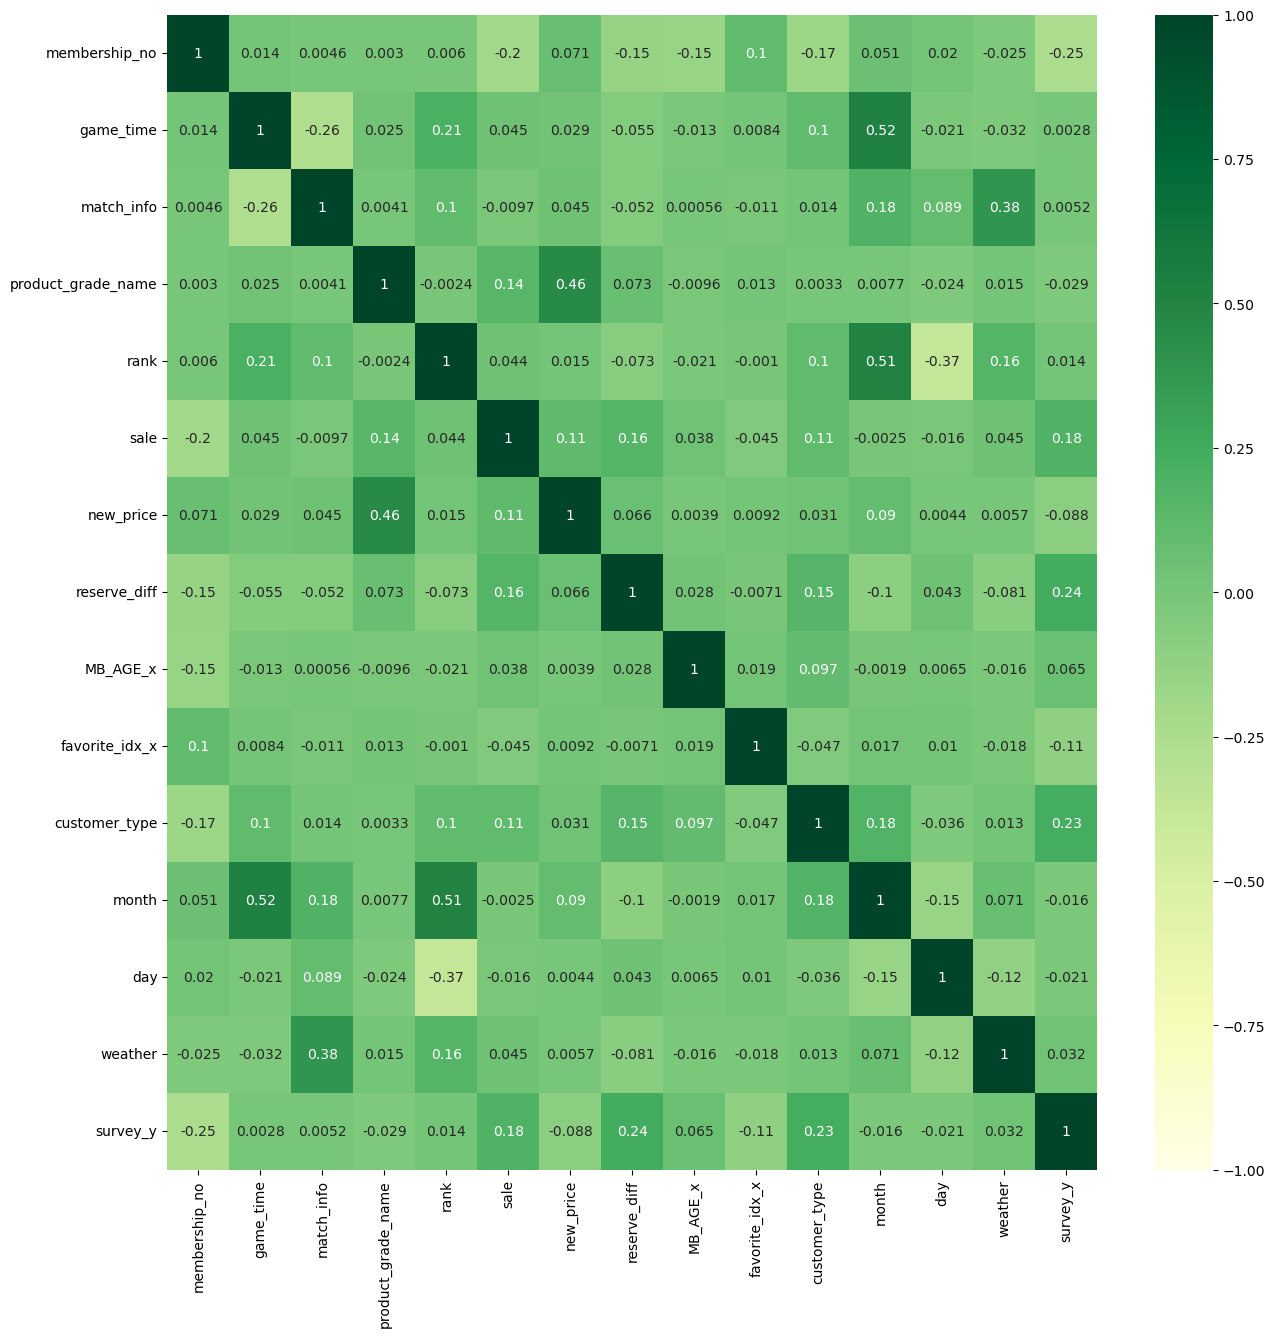

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (15,15))
# %plt.rcParams['axes.unicode_minus'] = False

# 모든 조합, 상관계수 표현
sns.heatmap(features.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'YlGn');

In [18]:
customerrr.drop_duplicates(inplace = True)

# Modeling

- scaling & Encoding

- train test 분리하기 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y = customerrr['re_y']
X = customerrr.iloc[:,:-1]
X = X.drop(['game_date','membership_no'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train)

# train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

In [21]:
print("y_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (13890,)
y_val shape:  (4631,)
y_test shape:  (4631,)


In [22]:
print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (13890, 14)
X_val shape:  (4631, 14)
X_test shape:  (4631, 14)


## 기준모델

- 최빈클래스 0으로 모든 예측 수행

In [23]:
# mode(): Return the highest frequency value in a Series.
base_major = y_train.mode()[0]

# 타겟 샘플 수만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred_base = [base_major] * len(y_train)

In [24]:
# 최빈 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred_base).round(2))

training accuracy:  0.86


In [25]:
# 검증세트에서도 정확도를 확인해 볼 수 있습니다.
y_pred_base_val = [base_major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred_base_val).round(2))

validation accuracy:  0.86


In [26]:
# scaling
from sklearn.preprocessing import StandardScaler
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_val[numeric_feats] = scaler.transform(X_val[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [27]:
from sklearn.linear_model import LinearRegression, LogisticRegression

logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)
y_val_pred = logistic.predict(X_val)
print('logistic train accuracy', logistic.score(X_train, y_train).round(2))
print("logistic validation accuracy: ", accuracy_score(y_val, y_val_pred).round(2))

logistic train accuracy 0.92
logistic validation accuracy:  0.92


In [28]:
returns = pd.DataFrame(data = {'Prediction' : logistic.predict(X_test)})
list(logistic.predict(X_test))
print(len(list(logistic.predict(X_train))))
print(len(list(logistic.predict(X_val))))

13890
4631


In [29]:
print('회귀계수가 양수인 특성 상위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).head(3), '\n')
print('회귀계수가 음수인 특성 하위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).tail(3))

회귀계수가 양수인 특성 상위 3개
customer_type    3.919457
survey_y         0.487129
MB_AGE_x         0.414530
dtype: float64 

회귀계수가 음수인 특성 하위 3개
day         -0.302114
month       -1.186534
new_price   -1.319010
dtype: float64


In [30]:
y_true0 = y_val.value_counts()[0]
y_true1 = y_val.value_counts()[1]
fn = len(y_pred_base_val) - y_true0
base = pd.DataFrame(index = ['True 0', 'True1'], data = {'Predicted 0':[y_true0, fn], 'Predicted 1':[0,0]})
base

,Predicted 0,Predicted 1
True 0,631,0
True1,4000,0


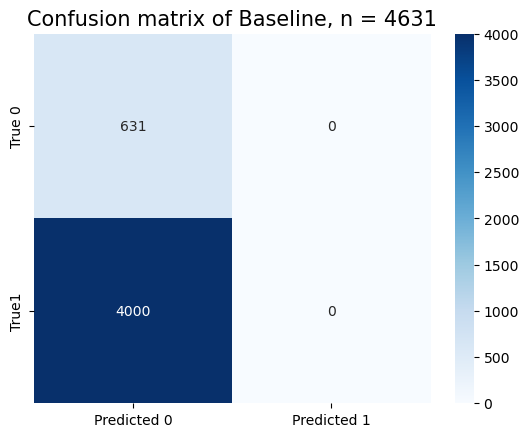

In [31]:
fig, ax = plt.subplots()
sns.heatmap(base, cmap=plt.cm.Blues, annot=True,fmt="d")
plt.title(f'Confusion matrix of Baseline, n = {len(y_val)}', fontsize=15)
plt.show()

c:\Users\zxoro\anaconda3\envs\cp2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


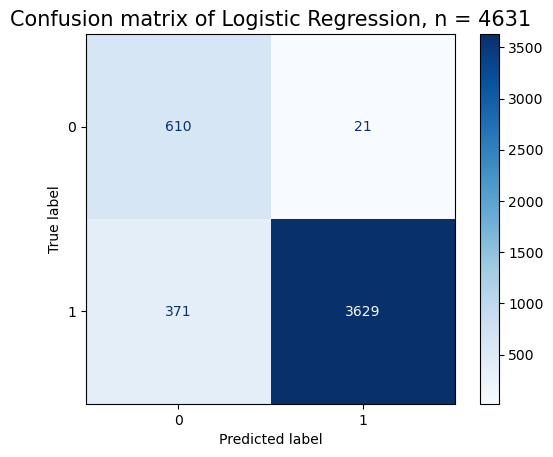

In [32]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(logistic, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_val)}', fontsize=15)
plt.show()

In [33]:
cm = pcm.confusion_matrix
cm

array([[ 610,   21],
       [ 371, 3629]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print(classification_report(y_val, y_val_pred))

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'accuracy of logistic regression is {accuracy.round(2)}')
print(f'precision of logistic regression is {precision.round(2)}')
print(f'recall of logistic regression is {recall.round(2)}')
print(f'f1 of logistic regression is {f1.round(2)}')

              precision    recall  f1-score   support

           0       0.62      0.97      0.76       631
           1       0.99      0.91      0.95      4000

    accuracy                           0.92      4631
   macro avg       0.81      0.94      0.85      4631
weighted avg       0.94      0.92      0.92      4631

accuracy of logistic regression is 0.92
precision of logistic regression is 0.99
recall of logistic regression is 0.91
f1 of logistic regression is 0.95


In [35]:
# pip install eli5

In [36]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import metrics
perm = PermutationImportance(logistic, random_state = 1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1764 ± 0.0081,customer_type
0.0080 ± 0.0042,month
0.0011 ± 0.0011,sale
0.0008 ± 0.0048,new_price
0.0006 ± 0.0018,rank
-0.0003 ± 0.0009,game_time
-0.0006 ± 0.0018,match_info
-0.0007 ± 0.0021,weather
-0.0008 ± 0.0007,favorite_idx_x
-0.0010 ± 0.0011,day


In [37]:
# customer_type
# sale
# MB_AGE_X
# rank

**정규화**
- 로지스틱 회귀 알고리즘 사용하기 전에 데이터 정규화
- StandardScaler
- MinMaxScaler
- RobustScaler

### XGBOOST

In [38]:
# pip install xgboost

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

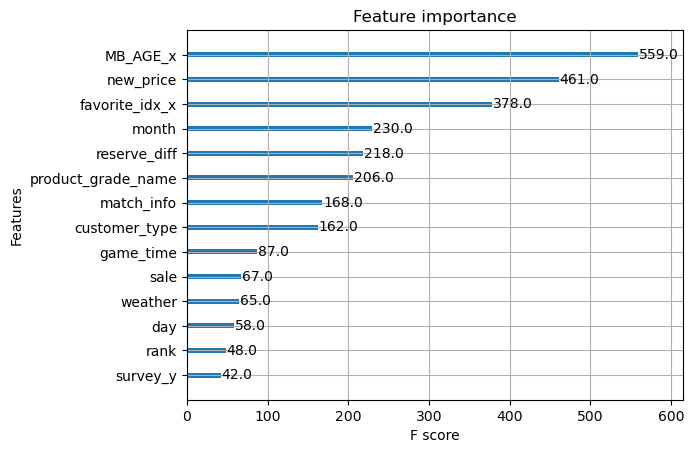

In [39]:
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier(random_state=11)
model.fit(X_train, y_train)

plot_importance(model, max_num_features=20)

# customer Type을 제거한 결과 , survey를 하고 안 하고의 차이와 언제 예매를 했는지 

In [40]:
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier

# 미리 사용할 알고리즘을 fit 해야한다
model = RandomForestClassifier().fit(X_train, y_train)

perm = PermutationImportance(model, scoring = "accuracy", random_state = 22).fit(X_val, y_val) 
eli5.show_weights(perm, top = 20, feature_names = X_val.columns.tolist())

Weight,Feature
0.1899 ± 0.0053,customer_type
0.0229 ± 0.0045,new_price
0.0155 ± 0.0027,month
0.0131 ± 0.0014,MB_AGE_x
0.0039 ± 0.0022,survey_y
0.0032 ± 0.0013,match_info
0.0022 ± 0.0030,reserve_diff
0.0020 ± 0.0013,sale
0.0016 ± 0.0016,product_grade_name
0.0010 ± 0.0010,day
